In [31]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from operator import itemgetter
from numpy.random import default_rng

p = 50
f = 10
sf = 5
r = 5

title = "p = " + str(p) + " f = " + str(f) + " sf = " + str(sf) + " r  =" + str(r)

# Generate Demand points
dx_points = default_rng().choice(p, size=(p - f), replace=False)
dy_points = default_rng().choice(p, size=(p - f), replace=False)

# Generate candidate sites
csx_points = default_rng().choice(p, size=(f), replace=False)
csy_points = default_rng().choice(p, size=(f), replace=False)

# Data to analize
demand_points = []
candidate_sites = []

for x in range(p - f):
    demand_points.append([dx_points[x], dy_points[x]])

for x in range(f):
    candidate_sites.append([csx_points[x], csy_points[x]])


# Divide data
non_selected_sites = list(candidate_sites)
non_covered_points = list(demand_points)


In [32]:
def showInitialPlot(d_points, cs_points):
    fig = plt.figure(figsize=(10,10))
    plt.title(title)
    plt.suptitle('Random Generated Demand and Candidate Points')
    if p >= 100:
        ms = 1
    else:
        ms = 20
    plt.scatter([i[0] for i in d_points], [i[1] for i in d_points], c='black', s=ms)
    plt.scatter([i[0] for i in cs_points], [i[1] for i in cs_points], c='red', s=ms + 15)
    plt.savefig("firstg.jpg")
    plt.show()


def addCirclesToPlot(d_points, cs_points, selected_points, of):
    fig = plt.figure(figsize=(10,10))
    ax = plt.gca()
    plt.title(title)
    plt.suptitle('Random Generated Demand and Candidate Points')
    if p >= 100:
        ms = 1
    else:
        ms = 20
    plt.scatter([i[0] for i in d_points], [i[1] for i in d_points], c='black', s=ms)
    plt.scatter([i[0] for i in cs_points], [i[1] for i in cs_points], c='red', s=ms + 15)
    for point in selected_points:
        circle = plt.Circle((point[0], point[1]), r, color='blue', fill=False)
        ax.add_patch(circle)
    plt.xlabel('Objective Function: ' + str(of))
    plt.savefig("secondg.jpg")
    plt.show()

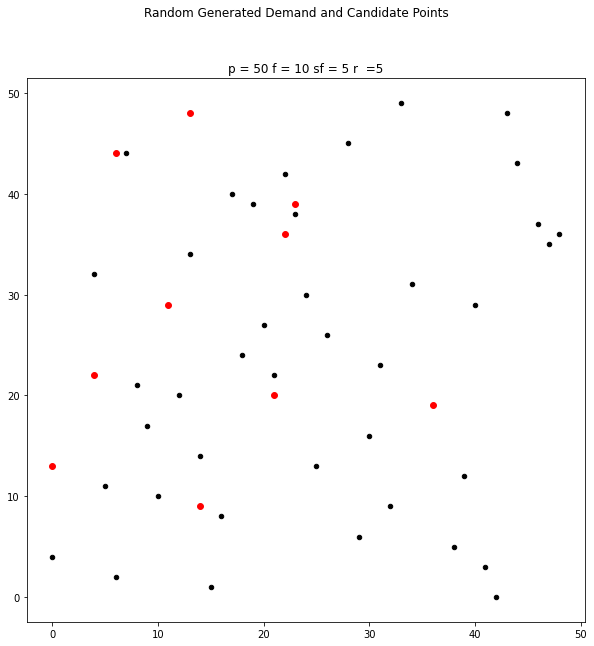

Selected sites: [[22, 36], [14, 9]]
Non selected sites [[6, 44], [21, 20], [13, 48], [36, 19], [11, 29], [4, 22], [23, 39], [0, 13]]
Covered points: [[7, 44], [23, 38], [19, 39], [10, 10], [16, 8], [8, 21], [22, 42], [21, 22]]
Non covered points: [[4, 32], [24, 30], [32, 9], [20, 27], [9, 17], [47, 35], [17, 40], [18, 24], [14, 14], [5, 11], [40, 29], [25, 13], [28, 45], [46, 37], [39, 12], [0, 4], [13, 34], [15, 1], [38, 5], [44, 43], [30, 16], [41, 3], [42, 0], [29, 6], [33, 49], [34, 31], [31, 23], [6, 2], [12, 20], [48, 36], [26, 26], [43, 48]]
Objective function 8


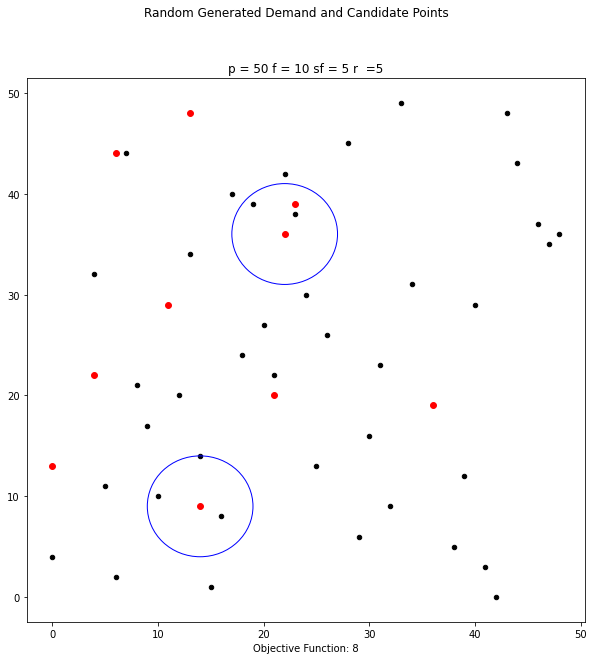

In [33]:
of = 0
selected_sites = []
covered_points = []
S = len(selected_sites)

for i in range(sf):
    for site in non_selected_sites:
        count = 0
        for point in non_covered_points:
            d = sqrt((point[0] - site[0]) ** 2 + (site[1] - point[1]) ** 2)
            if d < r:
                covered_points.append(point)
                non_covered_points.remove(point)
                count += 1
        if count > 1:
            selected_sites.append(site)
            non_selected_sites.remove(site)
        of += count

showInitialPlot(demand_points, candidate_sites)
print("Selected sites:", selected_sites)
print("Non selected sites", non_selected_sites)
print("Covered points:", covered_points)
print("Non covered points:", non_covered_points)
print("Objective function", of)
addCirclesToPlot(demand_points, candidate_sites, selected_sites, of)
            